In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import  cvxopt 
import time
import torch
# train_data=np.loadtxt('train_data.txt')
# print(train_data)
train_data_path = "/Users/Jun/Documents/18661_ML/HW4/hw4_program_q5/train_data.txt"
train_label_path = "/Users/Jun/Documents/18661_ML/HW4/hw4_program_q5/train_label.txt"
test_data_path = "/Users/Jun/Documents/18661_ML/HW4/hw4_program_q5/test_data.txt"
test_label_path = "/Users/Jun/Documents/18661_ML/HW4/hw4_program_q5/test_label.txt"

train_data = np.genfromtxt(train_data_path)
train_label = np.genfromtxt(train_label_path)
test_data = np.genfromtxt(test_data_path)
test_label = np.genfromtxt(test_label_path)

# print(train_data)

5.1 data process:

a.calcumate the mean:

In [2]:
row_train, col_train = train_data.shape
row_test, col_test = test_data.shape
sum_train = np.zeros(60)
avg_train = np.zeros(60)
sum_test = np.zeros(60)
avg_test = np.zeros(60)
for i in range (col_train):
    for j in range (row_train):
        sum_train[i] += train_data[j][i]
    avg_train[i] = sum_train[i]/row_train
for i in range (col_test):
    for j in range(row_test):
        sum_test[i] += test_data[j][i]
    avg_test[i] = sum_test[i]/row_test
# print(avg_train)
# print(avg_test)

b:standar deviation

In [3]:
s_train = np.zeros(60)
srq_train = np.zeros(60)
s_test = np.zeros(60)
srq_test = np.zeros(60)

for i in range(col_train):
    for j in range(row_train):
        srq_train[i] += (train_data[j, i] - avg_train[i])**2
    s_train[i] = (srq_train[i] / (row_train - 1))**(1/2)
for i in range(col_test):
    for j in range(row_test):
        srq_test[i] += (test_data[j, i] - avg_test[i])**2
    s_test[i] = (srq_test[i] / (row_test - 1))**(1/2)

In [4]:
print("mean[2] ", avg_train[2])
print("standard deviation[2]", s_train[2])
print("mean[9]", avg_train[9])
print("standard deviation[9]", s_train[9])

mean[2]  2.54
standard deviation[2] 1.0749676997731392
mean[9] 2.527
standard deviation[9] 1.1245156893238686


In [5]:
def train_svm(train_data, train_label, C):
    """Train linear SVM (primal form)

    Argument:
    train_data: N*D matrix, each row as a sample and each column as a feature
    train_label: N*1 vector, each row as a label
    C: tradeoff parameter (on slack variable side)

    Return:
    w: feature vector (column vector)
    b: bias term
    """
    #the train_data have the size (1000, 60) , therefore, once we calculate the matrix
    n = train_data.shape[0]
    d = train_data.shape[1]
    P = cvxopt.matrix(0.5 * np.outer(train_label, train_label)*np.dot(train_data, train_data.T))
    q = cvxopt.matrix(-1 * np.ones(n))
    G1 = cvxopt.matrix(np.diag(-1 * np.ones(n)))
    h1 = cvxopt.matrix(np.zeros(n))
    G2 = cvxopt.matrix(np.diag(np.ones(n)))
    h2 = cvxopt.matrix(C * np.ones(n))
    G = cvxopt.matrix(np.vstack((G1, G2)))
    h = cvxopt.matrix(np.vstack((h1, h2)))
    solution = cvxopt.solvers.qp(P, q, G, h,)
    a = np.array(solution['x'])
    a = a.flatten()
    tmp = a * train_label 
    tmp = tmp.reshape(n,-1)
    tmp = tmp * train_data
    w = np.sum(tmp, 0)
    b = train_label - np.dot(train_data, w)
    b = np.mean(b)
    return w, b



In [6]:
# for the test data, the size is (2175, 60)
def test_svm(test_data, test_label, w, b):
    """Test linear SVM

    Argument:
    test_data: M*D matrix, each row as a sample and each column as a feature
    test_label: M*1 vector, each row as a label
    w: feature vector
    b: bias term

    Return:
    test_accuracy: a float between [0, 1] representing the test accuracy
    """
    m = np.size(test_data,0)
    hit= 0
    for i in range (m):
        predict = (test_data[i,:] @ w)+b
        if predict >= 0:
            label1 = 1.0
        else: 
            label1 = -1.0
        if label1 == test_label[i]:
            hit+=1
        hit+=0
    accurate = hit / np.size(test_label)
    return accurate





In [7]:
index = np.arange(200 * 0, 200 * (0 + 1))
print(index)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199]


In [8]:
k=5
valid_accuracy = []
training_time = []
for power in range(-6, 7):
    C = 4 ** power
    acc = np.zeros(5)
    start = time.time()
    for i in range(5):
        index = np.arange(200*i, 200*(i+1))
        x_train = train_data
        x_train_label = train_label
        x_train = np.delete(x_train, index,0)
        x_train_label = np.delete(x_train_label, index)
        x_test = train_data[200 * i: 200 * i + 200]
        x_test_label = train_label[200 * i: 200 * (i + 1)]
        w, b = train_svm(x_train, x_train_label, C)
        acc[i] = test_svm(x_test, x_test_label, w, b)
    acc_mean = np.sum(acc) / k
    end = time.time()
    training_time.append((end - start) / 5)
    valid_accuracy.append(acc_mean)
    print("C = 4 **", power, ", Accuracy =  ",
          acc_mean, ", Time = ", end - start)

     pcost       dcost       gap    pres   dres
 0: -2.0115e+02 -7.1616e-01  6e+03  8e+01  1e-12
 1: -2.6304e+00 -7.1276e-01  7e+01  9e-01  9e-13
 2: -4.8859e-01 -5.7245e-01  5e+00  7e-02  7e-14
 3: -1.4566e-01 -4.5458e-01  3e-01  7e-18  3e-15
 4: -1.6593e-01 -2.1319e-01  5e-02  2e-18  2e-15
 5: -1.8432e-01 -1.8696e-01  3e-03  1e-18  2e-15
 6: -1.8544e-01 -1.8554e-01  1e-04  1e-18  1e-15
 7: -1.8551e-01 -1.8551e-01  1e-06  1e-18  1e-15
 8: -1.8551e-01 -1.8551e-01  1e-08  1e-18  1e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.0016e+02 -7.2337e-01  6e+03  8e+01  1e-12
 1: -2.6348e+00 -7.1984e-01  7e+01  9e-01  1e-12
 2: -5.1019e-01 -5.7614e-01  6e+00  7e-02  9e-14
 3: -1.4667e-01 -4.6269e-01  4e-01  7e-04  3e-15
 4: -1.6107e-01 -2.2495e-01  7e-02  1e-04  1e-15
 5: -1.7933e-01 -1.8765e-01  9e-03  1e-05  1e-15
 6: -1.7967e-01 -1.8552e-01  6e-03  8e-06  1e-15
 7: -1.7964e-01 -1.8534e-01  6e-03  7e-06  1e-15
 8: -1.7986e-01 -1.8457e-01  5e-03  5e-06  9e-1

 2: -1.4161e+00 -6.2026e+00  5e+00  5e-03  1e-14
 3: -1.5825e+00 -2.1645e+00  6e-01  6e-04  5e-15
 4: -1.7940e+00 -1.9075e+00  1e-01  8e-05  6e-15
 5: -1.8395e+00 -1.8652e+00  3e-02  2e-05  6e-15
 6: -1.8498e+00 -1.8550e+00  5e-03  2e-06  6e-15
 7: -1.8522e+00 -1.8526e+00  5e-04  1e-07  6e-15
 8: -1.8524e+00 -1.8524e+00  4e-05  1e-08  6e-15
 9: -1.8524e+00 -1.8524e+00  7e-07  2e-10  7e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.0580e+02 -7.4223e+00  6e+03  8e+01  1e-12
 1: -3.6029e+00 -7.4098e+00  7e+01  9e-01  1e-12
 2: -1.5052e+00 -6.4353e+00  6e+00  2e-02  2e-14
 3: -1.6354e+00 -2.2834e+00  7e-01  2e-03  6e-15
 4: -1.8652e+00 -1.9926e+00  1e-01  3e-04  7e-15
 5: -1.9062e+00 -1.9564e+00  5e-02  7e-05  7e-15
 6: -1.9253e+00 -1.9358e+00  1e-02  1e-05  7e-15
 7: -1.9294e+00 -1.9316e+00  2e-03  1e-06  7e-15
 8: -1.9303e+00 -1.9306e+00  2e-04  1e-07  7e-15
 9: -1.9304e+00 -1.9304e+00  1e-05  4e-09  7e-15
10: -1.9304e+00 -1.9304e+00  3e-07  9e-11  7e-

     pcost       dcost       gap    pres   dres
 0: -2.5129e+02 -4.5564e+02  7e+03  1e+01  1e-12
 1: -8.5370e+01 -3.9760e+02  8e+02  9e-01  1e-12
 2: -6.5926e+01 -1.9790e+02  2e+02  1e-01  4e-13
 3: -6.8764e+01 -9.4243e+01  3e+01  2e-02  3e-13
 4: -7.3712e+01 -8.2152e+01  9e+00  4e-03  4e-13
 5: -7.5266e+01 -7.9158e+01  4e+00  2e-03  4e-13
 6: -7.6190e+01 -7.7426e+01  1e+00  3e-04  5e-13
 7: -7.6488e+01 -7.6936e+01  5e-01  8e-05  4e-13
 8: -7.6609e+01 -7.6757e+01  2e-01  2e-05  4e-13
 9: -7.6647e+01 -7.6704e+01  6e-02  5e-06  5e-13
10: -7.6669e+01 -7.6675e+01  7e-03  4e-07  5e-13
11: -7.6671e+01 -7.6672e+01  5e-04  2e-08  5e-13
12: -7.6672e+01 -7.6672e+01  9e-06  4e-10  5e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.5004e+02 -4.5749e+02  7e+03  1e+01  1e-12
 1: -8.6618e+01 -4.0029e+02  9e+02  1e+00  1e-12
 2: -6.6131e+01 -2.0806e+02  2e+02  1e-01  4e-13
 3: -6.9099e+01 -9.5773e+01  3e+01  2e-02  3e-13
 4: -7.3892e+01 -8.4426e+01  1e+01  6e-03  3e-1

14: -1.1940e+03 -1.1940e+03  3e-03  8e-10  7e-12
15: -1.1940e+03 -1.1940e+03  3e-05  9e-12  8e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -9.9478e+02 -1.6242e+04  5e+04  1e+00  6e-12
 1: -8.6100e+02 -8.1093e+03  1e+04  1e-01  5e-12
 2: -8.8431e+02 -2.1818e+03  1e+03  2e-02  5e-12
 3: -1.0369e+03 -1.5634e+03  6e+02  6e-03  5e-12
 4: -1.1069e+03 -1.4082e+03  3e+02  3e-03  5e-12
 5: -1.1448e+03 -1.3245e+03  2e+02  1e-03  5e-12
 6: -1.1729e+03 -1.2648e+03  9e+01  5e-04  5e-12
 7: -1.1897e+03 -1.2323e+03  4e+01  2e-04  5e-12
 8: -1.1986e+03 -1.2171e+03  2e+01  5e-05  5e-12
 9: -1.2028e+03 -1.2105e+03  8e+00  2e-05  5e-12
10: -1.2048e+03 -1.2073e+03  2e+00  5e-06  5e-12
11: -1.2054e+03 -1.2064e+03  1e+00  2e-06  5e-12
12: -1.2057e+03 -1.2060e+03  4e-01  4e-07  6e-12
13: -1.2058e+03 -1.2059e+03  4e-02  2e-08  6e-12
14: -1.2058e+03 -1.2058e+03  1e-03  4e-10  6e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -9.5497e+02 -1.5008

 7: -1.8165e+04 -2.0710e+04  3e+03  3e-05  9e-11
 8: -1.8509e+04 -2.0076e+04  2e+03  2e-05  9e-11
 9: -1.8732e+04 -1.9635e+04  9e+02  6e-06  9e-11
10: -1.8928e+04 -1.9273e+04  3e+02  1e-06  1e-10
11: -1.9008e+04 -1.9154e+04  1e+02  3e-07  1e-10
12: -1.9039e+04 -1.9109e+04  7e+01  2e-07  1e-10
13: -1.9056e+04 -1.9085e+04  3e+01  4e-08  1e-10
14: -1.9065e+04 -1.9072e+04  7e+00  8e-09  1e-10
15: -1.9067e+04 -1.9070e+04  3e+00  1e-09  1e-10
16: -1.9068e+04 -1.9069e+04  5e-01  2e-10  1e-10
17: -1.9068e+04 -1.9068e+04  1e-01  4e-11  1e-10
18: -1.9068e+04 -1.9068e+04  1e-02  2e-16  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.1809e+04 -2.7637e+06  7e+06  8e-01  1e-10
 1: -9.1135e+03 -9.9416e+05  1e+06  6e-02  8e-11
 2: -1.1630e+04 -1.2541e+05  1e+05  4e-03  6e-11
 3: -1.3160e+04 -3.6488e+04  2e+04  8e-04  6e-11
 4: -1.5285e+04 -3.0085e+04  1e+04  4e-04  7e-11
 5: -1.6749e+04 -2.5093e+04  8e+03  2e-04  7e-11
 6: -1.7664e+04 -2.2731e+04  5e+03  1e-04  8e-

13: -7.8109e+04 -7.8365e+04  3e+02  5e-09  4e-10
14: -7.8185e+04 -7.8269e+04  8e+01  1e-09  4e-10
15: -7.8212e+04 -7.8236e+04  2e+01  3e-10  3e-10
16: -7.8221e+04 -7.8225e+04  4e+00  4e-11  4e-10
17: -7.8222e+04 -7.8223e+04  2e+00  1e-11  3e-10
18: -7.8223e+04 -7.8223e+04  5e-02  1e-13  4e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.1543e+04 -3.9069e+07  9e+07  7e-01  2e-10
 1:  1.2296e+03 -1.2001e+07  1e+07  4e-02  2e-10
 2: -4.3656e+04 -9.5515e+05  9e+05  2e-03  2e-10
 3: -4.8291e+04 -1.7464e+05  1e+05  2e-04  2e-10
 4: -5.6526e+04 -1.3583e+05  8e+04  1e-04  2e-10
 5: -6.1727e+04 -1.1428e+05  5e+04  6e-05  2e-10
 6: -6.6550e+04 -9.6859e+04  3e+04  3e-05  2e-10
 7: -6.8806e+04 -9.0608e+04  2e+04  2e-05  2e-10
 8: -7.1479e+04 -8.3433e+04  1e+04  8e-06  3e-10
 9: -7.2986e+04 -8.0094e+04  7e+03  4e-06  3e-10
10: -7.3778e+04 -7.8385e+04  5e+03  2e-06  2e-10
11: -7.4614e+04 -7.6698e+04  2e+03  8e-07  3e-10
12: -7.5012e+04 -7.6005e+04  1e+03  3e-07  2e-

15: -1.2322e+06 -1.2324e+06  3e+02  2e-16  6e-09
16: -1.2323e+06 -1.2323e+06  9e+01  2e-16  6e-09
17: -1.2323e+06 -1.2323e+06  1e+01  1e-16  6e-09
18: -1.2323e+06 -1.2323e+06  1e-01  2e-16  6e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.2021e+06 -9.9098e+09  2e+10  7e-01  4e-09
 1:  1.1212e+07 -3.2162e+09  4e+09  6e-02  3e-09
 2:  6.0272e+05 -4.7052e+08  5e+08  5e-03  3e-09
 3: -6.9059e+05 -9.5411e+06  9e+06  8e-05  3e-09
 4: -7.5800e+05 -2.2507e+06  1e+06  1e-05  3e-09
 5: -8.7550e+05 -1.9464e+06  1e+06  8e-06  3e-09
 6: -9.6007e+05 -1.6166e+06  7e+05  4e-06  3e-09
 7: -1.0163e+06 -1.4477e+06  4e+05  2e-06  4e-09
 8: -1.0588e+06 -1.3397e+06  3e+05  9e-07  4e-09
 9: -1.0984e+06 -1.2346e+06  1e+05  4e-07  4e-09
10: -1.1143e+06 -1.2034e+06  9e+04  2e-07  4e-09
11: -1.1309e+06 -1.1689e+06  4e+04  4e-08  4e-09
12: -1.1390e+06 -1.1547e+06  2e+04  1e-08  4e-09
13: -1.1428e+06 -1.1487e+06  6e+03  3e-09  4e-09
14: -1.1445e+06 -1.1463e+06  2e+03  7e-10  5e-

In [9]:
# Report averaged accuracy and training time

print("accuracy: ",valid_accuracy)
print("training time:",training_time)

accuracy:  [0.761, 0.772, 0.799, 0.8109999999999999, 0.8, 0.794, 0.796, 0.8, 0.796, 0.7969999999999999, 0.7969999999999999, 0.7969999999999999, 0.7969999999999999]
training time: [0.5884301662445068, 0.46265463829040526, 0.44048380851745605, 0.4902101993560791, 0.494357967376709, 0.5534404277801513, 0.6003141880035401, 0.6355708599090576, 0.6885129451751709, 0.7569950103759766, 0.7880488395690918, 0.7961696147918701, 0.7931757926940918]


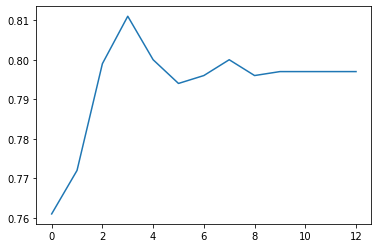

In [10]:
plt.plot(valid_accuracy)

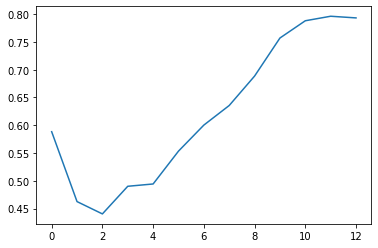

In [11]:
plt.plot(training_time)

5.3a: with the C increasing, the accuracy improve and then decreasing. For the time, it is first decreasing and increasing. Therefore, we need to choose 4^-3.

In [12]:
w, b = train_svm(train_data, train_label, 4**-3)
accuracy = test_svm(test_data, test_label, w, b)
print("SVM test accuracy = ", accuracy)


     pcost       dcost       gap    pres   dres
 0: -2.5739e+02 -3.5678e+01  8e+03  9e+01  1e-12
 1: -9.7199e+00 -3.5364e+01  1e+02  1e+00  1e-12
 2: -6.0415e+00 -2.4537e+01  3e+01  1e-01  1e-13
 3: -6.1872e+00 -8.7325e+00  3e+00  8e-03  3e-14
 4: -6.9368e+00 -7.7444e+00  8e-01  2e-03  3e-14
 5: -7.1689e+00 -7.4691e+00  3e-01  6e-04  3e-14
 6: -7.2583e+00 -7.3660e+00  1e-01  1e-04  3e-14
 7: -7.2860e+00 -7.3322e+00  5e-02  4e-05  3e-14
 8: -7.3029e+00 -7.3115e+00  9e-03  3e-06  3e-14
 9: -7.3062e+00 -7.3077e+00  1e-03  1e-07  3e-14
10: -7.3069e+00 -7.3070e+00  1e-04  9e-09  3e-14
11: -7.3069e+00 -7.3069e+00  2e-06  2e-10  3e-14
Optimal solution found.
SVM test accuracy =  0.8390804597701149


I am using 4^-3 due to the hightest accuracy and faster speed.